# Exploratory Data Analysis

Dataset: VP2016_votesPerRegion_Rappler

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
cat_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', 
              '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', 
              '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', 
              '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

import logging
logging.getLogger("FFC").setLevel(logging.ERROR) 

C:\Users\asus1\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


#### Get data

In [2]:
xl = pd.ExcelFile('../input/VP2016_votesPerRegion_Rappler.xlsx')

#### Merge sheets

In [3]:
dfs = []
for sheetname in xl.sheet_names:
    df = xl.parse(sheetname=sheetname)
    df['region'] = sheetname
    dfs.append(df)
data = pd.concat(dfs, axis=0)
data.head()

,timestamp,CAYETANO,ESCUDERO,HONASAN,MARCOS,ROBREDO,TRILLANES,region
0,2016-05-09 17:15:06,408,962,144,3046,1851,162,III
1,2016-05-09 18:45:47,408,962,144,3046,1851,162,III
2,2016-05-09 18:46:30,1712,3576,437,11585,6938,481,III
3,2016-05-09 18:47:11,2490,5146,621,16190,10536,751,III
4,2016-05-09 18:47:38,15822,29959,3072,91270,59874,4270,III


#### Clean and add new columns

In [4]:
# Clean data
data = data.rename(columns=lambda x: x.lower())
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data[data['region'] != 'PHILIPPINES']

# Add total votes for all candidates
data['total'] = data.ix[:, 'cayetano':'trillanes'].sum(axis=1)

# Add percent transmitted per region
data['pct_transmitted'] = data.groupby('region')['total'].transform(lambda x: x/max(abs(x)))

# Add vote difference then normalize
data['marcos-robredo'] = data['marcos'] - data['robredo']
data['marcos-robredo (normalized)'] = data.groupby('region')['marcos-robredo'].transform(lambda x: x/max(abs(x)))

#### Visualize

C:\Users\asus1\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


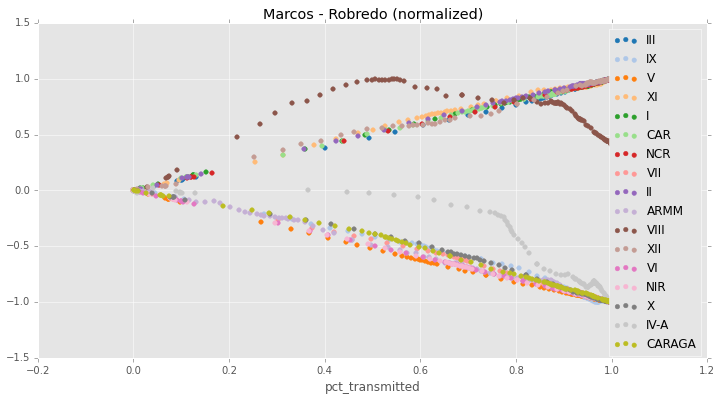

In [5]:
for i, region in enumerate(data['region'].unique()):
    mask = data['region']==region
    masked_data = data[mask]
    x = masked_data['pct_transmitted']
    y = masked_data['marcos-robredo (normalized)']
    plt.scatter(x, y, color=cat_colors[i], label=region)
plt.legend()
plt.title('Marcos - Robredo (normalized)')
plt.xlabel('pct_transmitted')